In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

vax_df = pd.read_csv("datasets/dados_vacinacao.csv")
vax_df.head(5)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,paciente_id
0,75.0,1945-08-21,F,99.0,SEM INFORMACAO,CAMPINA GRANDE,58400,CAMPINA GRANDE,2.0,Faixa Etária,2021-03-23,1ª Dose,86,ab6e7a0a8a6d54873f827405061d6762b8a838f5aef5d2...
1,54.0,1967-04-29,M,99.0,SEM INFORMACAO,CAMPINA GRANDE,58441,CAMPINA GRANDE,2.0,Faixa Etária,2021-07-23,2ª Dose,86,2df15799ec1d98adf957644142cf1b33da5eed86b29192...
2,38.0,1983-07-18,F,3.0,PARDA,JOAO PESSOA,58058,JOAO PESSOA,2.0,Faixa Etária,2022-03-07,Reforço,88,39c6a9cd8006a46fa554ca4253d4286a8f338582ac0c47...
3,27.0,1994-05-20,M,1.0,BRANCA,SANTA RITA,58300,SANTA RITA,2.0,Faixa Etária,2021-08-12,1ª Dose,87,f69f0b6a6b8d69512e8d3075a298301a16a86b7bb116ee...
4,102.0,1919-02-03,F,4.0,AMARELA,PRINCESA ISABEL,58755,PRINCESA ISABEL,2.0,Faixa Etária,2021-09-20,Reforço,87,35594e7cf93a021341142184af01b806ef1f36e4ddca71...


In [2]:
vax_df.value_counts('vacina_codigo')

vacina_codigo
87    1111977
85     770495
86     672553
88     109222
99      60422
89      42201
98       2104
dtype: int64

como tem dois códigos diferentes para catalogar astrazenica (85 e 89), iremos eliminar um do dicionario e adicionar as ocorrencias do outro ao primeiro

In [3]:
vax_codigos_dict = {85: 'Astrazenica',
                    86: 'Coronavac',
                    87: 'Pfizer',
                    88: 'Jansen',
                    99: 'Pfizer pediátrica'}

codigos = pd.Series(vax_codigos_dict)

In [4]:
vax_aplicacoes_dict = {87: 421567,
                       85: 308547,
                       86: 254651,
                       88: 41159,
                       99: 21899}

aplicacoes = pd.Series(vax_aplicacoes_dict)

In [5]:
vax_aplicadas = pd.DataFrame({"vacina":codigos, "quantidade de doses aplicadas": aplicacoes})
vax_aplicadas

,vacina,quantidade de doses aplicadas
85,Astrazenica,308547
86,Coronavac,254651
87,Pfizer,421567
88,Jansen,41159
99,Pfizer pediátrica,21899


<AxesSubplot:xlabel='vacina', ylabel='quantidade de doses aplicadas'>

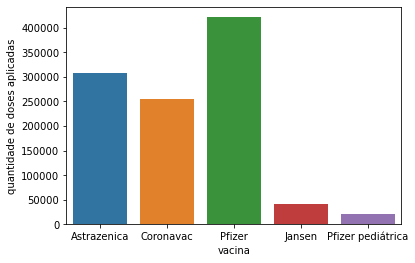

In [6]:
sns.barplot(data=vax_aplicadas, x='vacina', y='quantidade de doses aplicadas')

In [7]:
vax_df.value_counts('paciente_enumSexoBiologico')

paciente_enumSexoBiologico
F    1486850
M    1282109
I         13
dtype: int64

In [12]:
et_count = vax_df.value_counts('paciente_racaCor_valor')
et_count

paciente_racaCor_valor
PARDA             1024186
BRANCA             655883
AMARELA            586599
SEM INFORMACAO     387295
PRETA              103884
INDIGENA            11125
dtype: int64

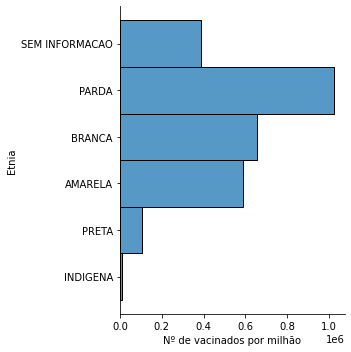

In [38]:
fig = sns.displot(data= vax_df, y= 'paciente_racaCor_valor')
fig.set_axis_labels(x_var= 'Nº de vacinados por milhão', y_var= 'Etnia')
fig.set_titles('Número de vacinados por Etnia')

In [33]:
vax_df.vacina_categoria_nome.unique()

array(['Faixa Etária', 'Comorbidades', 'Trabalhadores de Saúde',
       'Povos Indígenas', nan, 'Trabalhadores da Educação',
       'População Privada de Liberdade', 'Gestantes',
       'Pessoas de 60 anos ou mais institucionalizadas',
       'Pessoas com Deficiência', 'Povos e Comunidades Tradicionais',
       'Trabalhadores de Transporte', 'Forças de Segurança e Salvamento',
       'Trabalhadores Industriais', 'Pessoas em Situação de Rua',
       'Puérperas', 'Trabalhadores de Limpeza Urbana', 'Outros',
       'Forças Armadas (membros ativos)',
       'Funcionário do Sistema de Privação de Liberdade',
       'Trabalhadores Portuários'], dtype=object)